# CS 17600 Final Project
Ruiqi Xu, John Guan, Arav Kolli

For our final project, we decided to use 3 different NBA datasets: one of every player's stats by season from the 1996-97 season until the 2022-23 season, another of every team's stats from the 2000-01 season until the 2020-21 season, and another of every team's stats from the 2021-22 and 2022-23 seasons. We chose this because we're all interested in NBA basketball.

### Data Cleaning

In [2]:
import pandas as pd

First, we read in our dataset of player data as `players_df`, then remove every row with a season before 2002-03.

In [11]:
players_df = pd.read_csv('all_seasons.csv')
players_df = players_df[players_df['season'] >= '2002-03']
display(players_df.head(3))

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2638,2638,Popeye Jones,DAL,33.0,203.20,113.398000,Murray State,USA,1992,2,...,2.0,2.3,0.3,-8.8,0.137,0.160,0.167,0.396,0.059,2002-03
2639,2639,Michael Doleac,NYK,26.0,210.82,118.841104,Utah,USA,1998,1,...,4.4,2.9,0.6,-5.3,0.076,0.173,0.187,0.451,0.068,2002-03
2640,2640,Michael Finley,DAL,30.0,200.66,102.058200,Wisconsin,USA,1995,1,...,19.3,5.8,3.0,12.6,0.044,0.122,0.240,0.514,0.124,2002-03


The following shows that each player occurs multiple times in the dataframe.

In [12]:
first_name_sorted = players_df.sort_values(['player_name', 'season'])
display(first_name_sorted.head(3))
# perhaps we can merge a dataset with data about team stats by season as well

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2929,2929,A.J. Guyton,GSW,25.0,185.42,81.646560,Indiana,USA,2000,2,...,0.0,0.0,1.0,-3.9,0.000,0.000,0.282,0.000,0.400,2002-03
12588,12588,A.J. Lawson,DAL,22.0,198.12,81.192968,South Carolina,Canada,Undrafted,Undrafted,...,3.7,1.4,0.1,-20.1,0.046,0.152,0.189,0.589,0.032,2022-23
12589,12589,AJ Green,MIL,23.0,195.58,86.182480,Northern Iowa,USA,Undrafted,Undrafted,...,4.4,1.3,0.6,-4.9,0.016,0.105,0.159,0.607,0.092,2022-23


The following reads our team data from 2002-03 to 2019-20, renaming "LA Clippers" to "Los Angeles Clippers" to match the other dataframes.

In [27]:
teams_df_00 = pd.read_csv('nba_team_stats_00_to_21.csv')
teams_df_00.TEAM = teams_df_00.TEAM.replace(to_replace={'LA Clippers': 'Los Angeles Clippers'})
teams_df_00 = teams_df_00[(teams_df_00['SEASON'] >= '2002-03') & (teams_df_00['SEASON'] != '2020-21')]
teams_df_00 = teams_df_00.reset_index(drop=True)
display(teams_df_00.head(3))

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,30,Milwaukee Bucks,73,56,17,0.767,48.2,118.7,43.3,90.9,...,51.7,25.9,15.1,7.2,5.9,4.5,19.6,21.7,10.1,2019-20
1,31,Toronto Raptors,72,53,19,0.736,48.3,112.8,40.2,87.9,...,45.4,25.2,14.8,8.8,5.0,5.5,21.7,20.4,6.2,2019-20
2,32,Los Angeles Lakers,71,52,19,0.732,48.1,113.4,42.3,88.3,...,45.7,25.4,15.2,8.6,6.6,3.7,20.7,21.7,5.8,2019-20


This reads in the team stats from 2020-21 to 2022-23, renaming columns to match the other dataframe and adding a `SEASON` column.

In [63]:
teams_df_23 = pd.read_csv('nba_team_stats_21_to_23.csv')
teams_df_23.Team = [teams_df_23.iloc[i].Team.strip('*') for i in range(len(teams_df_23.Team))]
teams_df_23.rename(columns={'Team': 'TEAM', 'G': 'GP', 'FG': 'FGM', '3P': '3PM', 'FT': 'FTM', 
                            'ORB': 'OREB', 'DRB': 'DREB', 'TRB': 'REB'}, inplace=True)
teams_df_23['TEAM'] = teams_df_23['TEAM'].str.strip('*')

for i in range(len(teams_df_23)):
    if i // 30 == 0:
        teams_df_23.loc[i, 'SEASON'] = '2022-23'
    elif i // 30 == 1:
        teams_df_23.loc[i, 'SEASON'] = '2021-22'
    else:
        teams_df_23.loc[i, 'SEASON'] = '2020-21'

teams_df_23['3P%'] = teams_df_23['3P%'] * 100
teams_df_23['FG%'] = teams_df_23['FG%'] * 100
display(teams_df_23.head(3))

,Rk,TEAM,GP,MP,FGM,FGA,FG%,3PM,3PA,3P%,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,1,Sacramento Kings,82,241.8,43.6,88.2,49.4,13.8,37.3,36.9,...,9.5,32.9,42.5,27.3,7.0,3.4,13.5,19.7,120.7,2022-23
1,2,Golden State Warriors,82,241.8,43.1,90.2,47.9,16.6,43.2,38.5,...,10.5,34.1,44.6,29.8,7.2,3.9,16.3,21.4,118.9,2022-23
2,3,Atlanta Hawks,82,242.1,44.6,92.4,48.3,10.8,30.5,35.2,...,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,2022-23


Concats the two team data dataframes then adds `'_TEAM'` to the end of each column name, stored in `teams_df`.

In [64]:
teams_df = pd.concat([teams_df_23, teams_df_00])
teams_df = teams_df.add_suffix('_TEAM')
teams_df.rename(columns={'TEAM_TEAM': 'TEAM'}, inplace=True)
display(teams_df)

,Rk_TEAM,TEAM,GP_TEAM,MP_TEAM,FGM_TEAM,FGA_TEAM,FG%_TEAM,3PM_TEAM,3PA_TEAM,3P%_TEAM,...,PTS_TEAM,SEASON_TEAM,teamstatspk_TEAM,W_TEAM,L_TEAM,WIN%_TEAM,MIN_TEAM,BLKA_TEAM,PFD_TEAM,+/-_TEAM
0,1.0,Sacramento Kings,82,241.8,43.6,88.2,49.4,13.8,37.3,36.9,...,120.7,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Golden State Warriors,82,241.8,43.1,90.2,47.9,16.6,43.2,38.5,...,118.9,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Atlanta Hawks,82,242.1,44.6,92.4,48.3,10.8,30.5,35.2,...,118.4,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Boston Celtics,82,243.7,42.2,88.8,47.5,16.0,42.6,37.7,...,117.9,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Oklahoma City Thunder,82,242.1,43.1,92.6,46.5,12.1,34.1,35.6,...,117.5,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,NaN,Los Angeles Clippers,82,NaN,34.6,79.1,43.7,4.8,14.4,33.1,...,93.8,2002-03,563.0,27.0,55.0,0.329,48.2,5.1,0.0,-4.1
534,NaN,Miami Heat,82,NaN,32.8,79.5,41.2,4.2,13.4,31.6,...,85.6,2002-03,564.0,25.0,57.0,0.305,48.4,5.3,0.1,-5.0
535,NaN,Toronto Raptors,82,NaN,34.7,81.3,42.7,5.0,14.5,34.3,...,90.9,2002-03,565.0,24.0,58.0,0.293,48.3,5.0,0.1,-5.9
536,NaN,Cleveland Cavaliers,82,NaN,34.8,82.3,42.2,3.6,10.9,32.7,...,91.4,2002-03,566.0,17.0,65.0,0.207,48.4,6.0,0.1,-9.6


The following converts all team abbreviations into the full team names in the `players_df` to match `teams_df`, then merges the two on `TEAM` and `SEASON_TEAM`. This allows for easier comparison between individual players and their teams since they are all in the same row.

In [92]:
team_names = {'HOU': 'Houston Rockets',        'LAC': 'Los Angeles Clippers',   'LAL': 'Los Angeles Lakers', 
              'GSW': 'Golden State Warriors',  'OKC': 'Oklahoma City Thunder',  'IND': 'Indiana Pacers', 
              'ORL': 'Orlando Magic',          'WSH': 'Washington Wizards',     'DET': 'Detroit Pistons', 
              'DEN': 'Denver Nuggets',         'UTA': 'Utah Jazz',              'TOR': 'Toronto Raptors', 
              'BOS': 'Boston Celtics',         'SAC': 'Sacramento Kings',       'DAL': 'Dallas Mavericks', 
              'SAS': 'San Antonio Spurs',      'MIN': 'Minnesota Timberwolves', 'PHI': 'Philadephia 76ers', 
              'ATL': 'Atlanta Hawks',          'MIL': 'Milwaukee Bucks',        'MIA': 'Miami Heat', 
              'PHX': 'Phoenix Suns',           'CHI': 'Chicago Bulls',          'NYK': 'New York Knicks', 
              'POR': 'Portland Trail Blazers', 'CLE': 'Cleveland Cavaliers',    'CHH': 'Charlotte Hornets', 
              'NOR': 'New Orleans Pelicans',   'BKN': 'Brooklyn Nets',          'MEM': 'Memphis Grizzlies', 
              'VAN': 'Vancouver Grizzlies',    'NJN': 'New Jersey Nets',        'SEA': 'Seattle SuperSonics', 
              'NOH': 'New Orleans Hornets',    'CHA': 'Charlotte Hornets'}

players_df['TEAM'] = players_df['team_abbreviation'].replace(team_names)
final_df = players_df.merge(right=teams_df, how='inner', 
                            left_on=['TEAM', 'season'], right_on=['TEAM', 'SEASON_TEAM'])
display(final_df.sort_values('player_name'))
# TODO: fix team names in all_seasons_df before merging

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,PTS_TEAM,SEASON_TEAM,teamstatspk_TEAM,W_TEAM,L_TEAM,WIN%_TEAM,MIN_TEAM,BLKA_TEAM,PFD_TEAM,+/-_TEAM
286,2929,A.J. Guyton,GSW,25.0,185.42,81.646560,Indiana,USA,2000,2,...,102.4,2002-03,557.0,38.0,44.0,0.463,48.2,6.0,0.0,-1.1
8866,12588,A.J. Lawson,DAL,22.0,198.12,81.192968,South Carolina,Canada,Undrafted,Undrafted,...,114.2,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8689,12589,AJ Green,MIL,23.0,195.58,86.182480,Northern Iowa,USA,Undrafted,Undrafted,...,116.9,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8910,12590,AJ Griffin,ATL,19.0,198.12,99.790240,Duke,USA,2022,1,...,118.4,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6074,9405,AJ Hammons,DAL,24.0,213.36,117.933920,Purdue,USA,2016,2,...,97.9,2016-17,141.0,33.0,49.0,0.402,48.2,3.4,19.4,-2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,6516,Zydrunas Ilgauskas,MIA,36.0,220.98,117.933920,NaN,Lithuania,1996,1,...,102.1,2010-11,302.0,58.0,24.0,0.707,48.2,3.0,21.8,7.5
1490,4086,Zydrunas Ilgauskas,CLE,31.0,220.98,117.933920,NaN,Lithuania,1996,1,...,97.6,2005-06,455.0,50.0,32.0,0.610,48.4,4.4,22.5,2.2
1200,3667,Zydrunas Ilgauskas,CLE,30.0,220.98,117.933920,NaN,Lithuania,1996,1,...,96.5,2004-05,496.0,42.0,40.0,0.512,48.4,5.1,0.0,0.8
426,3068,Zydrunas Ilgauskas,CLE,29.0,220.98,117.933920,NaN,Lithuania,1996,1,...,92.9,2003-04,530.0,35.0,47.0,0.427,48.4,5.3,0.0,-2.6


Gets the relevant columns for our analysis of the data.

In [198]:
final_df = final_df[['player_name', 'age', 'player_height', 'player_weight', 'country', 
                     'draft_number', 'pts', 'reb', 'ast', 'net_rating', 'usg_pct', 'ts_pct', 
                     'season', 'TEAM', 'PTS_TEAM', 'FGM_TEAM', 'FGA_TEAM', 'FG%_TEAM', '3PM_TEAM', '3PA_TEAM', 
                     '3P%_TEAM', 'FTM_TEAM', 'FTA_TEAM', 'FT%_TEAM', 'OREB_TEAM', 'DREB_TEAM', 'REB_TEAM', 
                     'AST_TEAM', 'TOV_TEAM', 'STL_TEAM', 'BLK_TEAM', 'PF_TEAM']]
display(final_df)

,player_name,age,player_height,player_weight,country,draft_number,pts,reb,ast,net_rating,...,FTA_TEAM,FT%_TEAM,OREB_TEAM,DREB_TEAM,REB_TEAM,AST_TEAM,TOV_TEAM,STL_TEAM,BLK_TEAM,PF_TEAM
0,Popeye Jones,33.0,203.20,113.398000,USA,41,2.0,2.3,0.3,-8.8,...,21.9,82.900,11.1,31.0,42.1,22.4,11.6,8.1,5.5,21.1
1,Michael Finley,30.0,200.66,102.058200,USA,21,19.3,5.8,3.0,12.6,...,21.9,82.900,11.1,31.0,42.1,22.4,11.6,8.1,5.5,21.1
2,Mark Strickland,32.0,208.28,99.790240,USA,Undrafted,1.0,1.8,0.0,-19.2,...,21.9,82.900,11.1,31.0,42.1,22.4,11.6,8.1,5.5,21.1
3,Nick Van Exel,31.0,185.42,88.450440,USA,37,12.5,2.8,4.3,6.0,...,21.9,82.900,11.1,31.0,42.1,22.4,11.6,8.1,5.5,21.1
4,Raef LaFrentz,27.0,210.82,111.130040,USA,3,9.3,4.8,0.8,7.7,...,21.9,82.900,11.1,31.0,42.1,22.4,11.6,8.1,5.5,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,Jaren Jackson Jr.,23.0,208.28,109.769264,USA,4,18.6,6.8,1.0,9.8,...,23.8,0.733,12.0,34.6,46.6,26.0,13.6,8.3,5.8,20.0
9145,Ja Morant,23.0,187.96,78.925008,USA,2,26.2,5.9,8.1,7.3,...,23.8,0.733,12.0,34.6,46.6,26.0,13.6,8.3,5.8,20.0
9146,Jacob Gilyard,24.0,175.26,72.574720,USA,Undrafted,3.0,4.0,7.0,-14.9,...,23.8,0.733,12.0,34.6,46.6,26.0,13.6,8.3,5.8,20.0
9147,Jake LaRavia,21.0,200.66,106.594120,USA,19,3.0,1.8,0.6,-7.6,...,23.8,0.733,12.0,34.6,46.6,26.0,13.6,8.3,5.8,20.0


### Analysis and Visualizations

In [70]:
import matplotlib.pyplot as plt
import numpy as np

Plots points per game by season for every American player, then for every non-American player on the same plot. In recent years, some more top-level international players can be seen, such as Giannis Antetokounmpo, Luka Doncic, and Nikola Jokic.

Text(0, 0.5, 'Points Per Game')

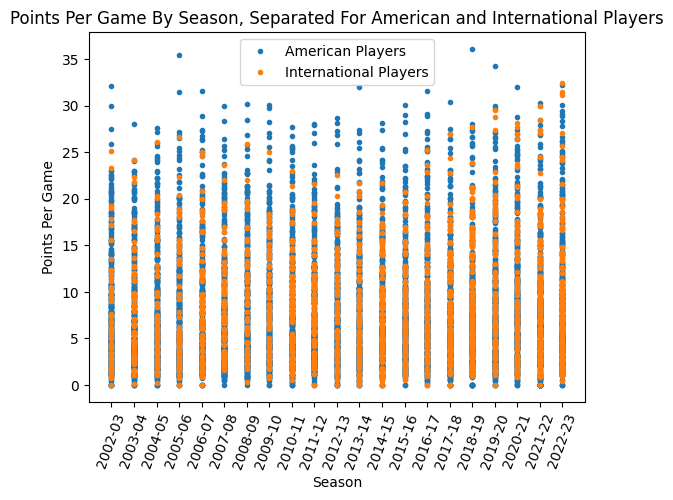

In [166]:
# gets subset of data including only players from the USA and international players respectively
usa = final_df[final_df['country'] == 'USA']
international = final_df[final_df['country'] != 'USA']
# plots
plt.plot(usa['season'], usa['pts'], '.')
plt.plot(international['season'], international['pts'], '.')
plt.legend(['American Players', 'International Players'])
plt.xticks(rotation=70)
plt.title('Points Per Game By Season, Separated For American and International Players')
plt.xlabel('Season')
plt.ylabel('Points Per Game')

Group by `season` then aggregate `PTS_TEAM` in order to get average points per game each season, then plots the averages by season in a line graph. An almost 20 point increase can be seen since 2002-03.

Text(0, 0.5, 'Points Per Game')

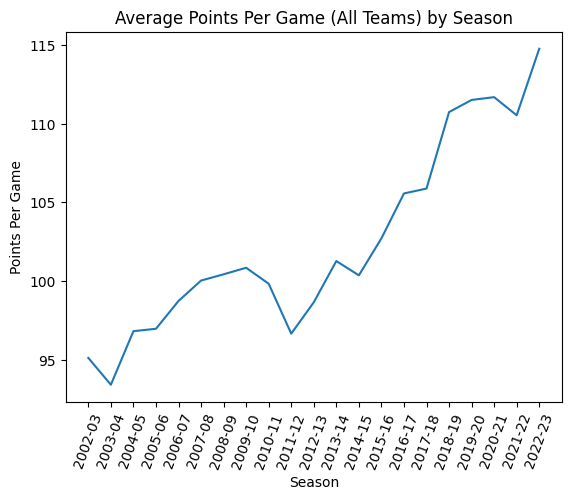

In [167]:
# gets the aggregated subset of the PTS_TEAM column of final_df after grouping by season
agg_df_ppg = final_df[['season', 'PTS_TEAM']].groupby(by=['season']).agg('mean')
plt.plot(agg_df_ppg.index, agg_df_ppg['PTS_TEAM'])
plt.xticks(rotation=70)
plt.title('Average Points Per Game (All Teams) by Season')
plt.xlabel('Season')
plt.ylabel('Points Per Game')

Groups by `season` again and aggregates on `3P%_TEAM` to get an average 3 point percentage by season, then plots that by season on a line graph. Also plots a regression line to more clearly see the general trend over the seasons. A slight positive correlation can be seen, indicating that the increase in 3 pointers made is due more to increased shooting than better percentages.

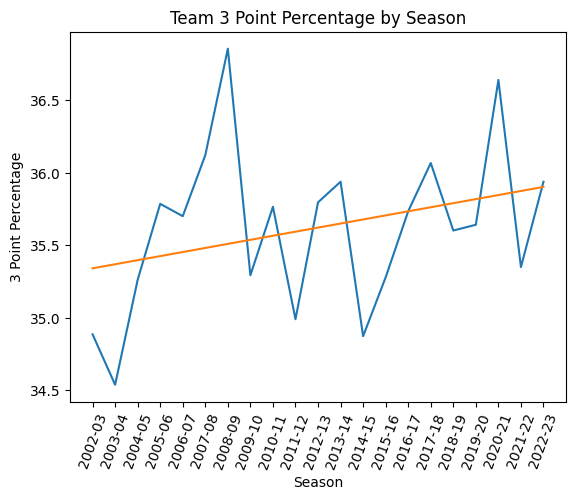

In [79]:
agg_df = final_df[['season', '3P%_TEAM']].groupby(by='season').agg('mean')
plt.plot(agg_df.index, agg_df['3P%_TEAM'])
plt.xticks(rotation=70)
plt.title('Team 3 Point Percentage by Season')
plt.xlabel('Season')
plt.ylabel('3 Point Percentage')
trend = np.polyfit(range(0, 21), agg_df['3P%_TEAM'], deg=1)
trend_line = np.poly1d(trend)
plt.plot(range(0, 21), trend_line(range(0, 21)))

Groups by season again and aggregates on `3PA_TEAM` to get the average 3 pointers attempted per game for each season, then graphs it by season on a line graph to see how 3 point attempts have changed. Does the same for `3PM_TEAM` to see 3 pointers made on the same bar chart. A more than doubling in made 3 pointers can be seen since 2002-03, and 3 pointers attempted also more than doubled, showing that the conclusion from the previous graph holds water.

Text(0, 0.5, '3 Pointers Made or Attempted/Game')

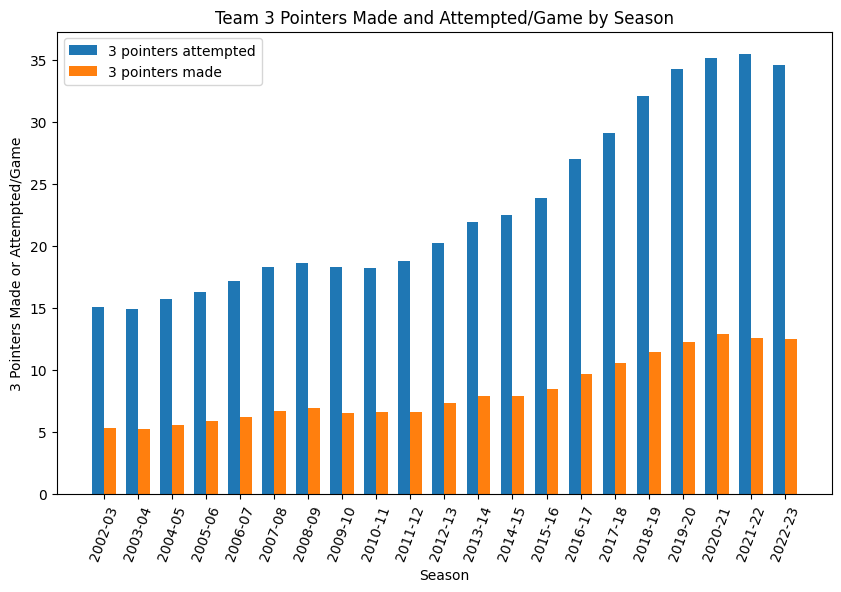

In [243]:
agg_df_3pa = final_df[['season', '3PA_TEAM']].groupby(by='season').agg('mean')
agg_df_3pm = final_df[['season', '3PM_TEAM']].groupby(by='season').agg('mean')
plt.figure(figsize=(10, 6))
plt.bar(agg_df_3pa.index, agg_df_3pa['3PA_TEAM'], align='edge', width=-0.35)
plt.bar(agg_df_3pm.index, agg_df_3pm['3PM_TEAM'], align='edge', width=0.35)
plt.xticks(rotation=70)
plt.legend(['3 pointers attempted', '3 pointers made'])
plt.title('Team 3 Pointers Made and Attempted/Game by Season')
plt.xlabel('Season')
plt.ylabel('3 Pointers Made or Attempted/Game')

The following plots a scatterplot of average team points per game vs. average team 3 pointers made per game. This shows a strong correlation between more made threes and more points scored per game, which may suggest the decently obvious outcome (because 3 points > 2 points) that increased scoring in recent years is due to an increase in 3 pointers made.

Text(0, 0.5, 'Team 3 Pointers Made/Game')

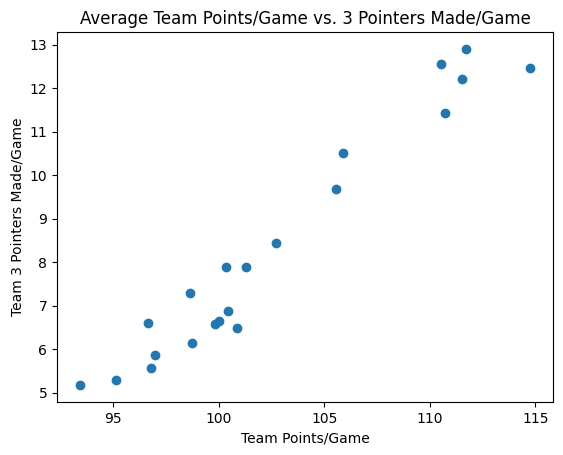

In [146]:
plt.scatter(agg_df_ppg['PTS_TEAM'], agg_df_1['3PM_TEAM'])
plt.title('Average Team Points/Game vs. 3 Pointers Made/Game')
plt.xlabel('Team Points/Game')
plt.ylabel('Team 3 Pointers Made/Game')

The following uses player points per game data from 2022-23 and 2002-03 to create 2 boxplots and a density plot with both seasons plotted to compare how scoring has changed. It can be seen that while there has been an increase in players scoring over 20 points per game, the distribution overall remains very similar, with a skew towards the right. The increase in player scoring over 20 points per game is likely also due to increased 3 point shooting.

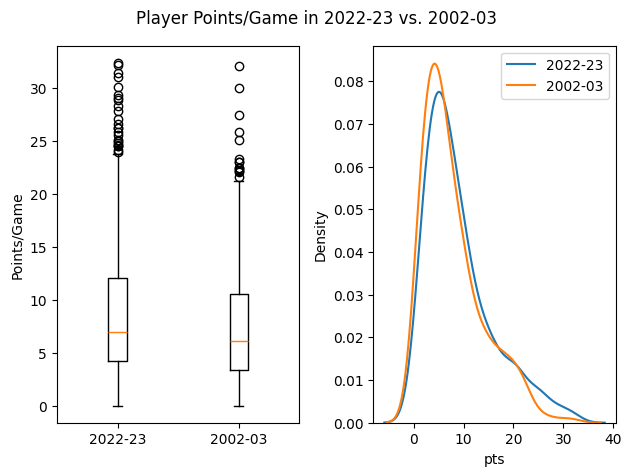

In [125]:
import seaborn as sns
fig, axs = plt.subplots(1, 2)
fig.suptitle('Player Points/Game in 2022-23 vs. 2002-03')
axs[0].boxplot([final_df[final_df['season'] == '2022-23']['pts'], final_df[final_df['season'] == '2002-03']['pts']],
               labels=['2022-23', '2002-03'])
axs[0].set_ylabel('Points/Game')
sns.kdeplot(final_df[final_df['season'] == '2022-23']['pts'], ax=axs[1])
sns.kdeplot(final_df[final_df['season'] == '2002-03']['pts'], ax=axs[1])
axs[1].legend(['2022-23', '2002-03'])
fig.tight_layout(pad=1)

The following plots a scatterplot of team points per game vs. player points per game. Interestingly, we can see that there does not seem to be much correlation here, suggesting that the increase in teams' scoring does not actually correspond with an increase in players' scoring by much if at all. This could mean that on average, each player now scores only a little more than they used to, thus not showing up much on the scatterplot. This seems to explain part of the difference; the density and box plots seem to show a very slightly higher scoring average per player in 2022-23, when team scoring was high, vs. 2002-03. Another possible explanation would be that more players are playing for each team now, which would mean that while average scoring per player doesn't change, their scoring per 36 minutes does change. At the highest scoring levels, there seems to be a few or one very high scoring player per team, which may explain the increase in players scoring over 20 points per game in the density plot previously.

Text(0, 0.5, 'Player Points/Game')

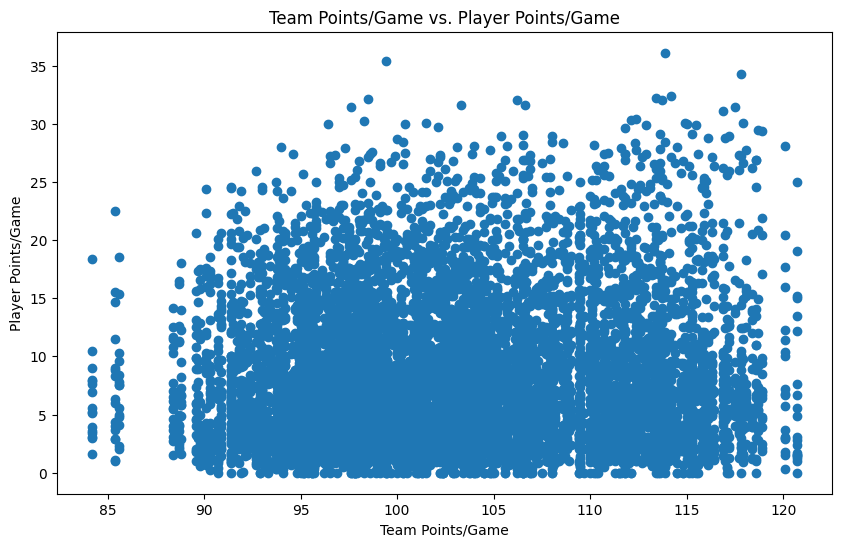

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PTS_TEAM'], final_df['pts'])
plt.title('Team Points/Game vs. Player Points/Game')
plt.xlabel('Team Points/Game')
plt.ylabel('Player Points/Game')

The following gets the subset of the `season` and `usg_pct` columns in `final_df` and groups by `season` before aggregating to get the average usage percentage across all players per season. Then, the resulting dataframe is plotted on a line plot comparing usage percentage by season. Since usage percentage is a measure of how often a possession ends (in scoring, a foul, or a turnover) with a certain player, a decrease in average usage percentage indicates that more players are getting playing time than before. This may be because of an increase in player talent levels (i.e. the "worst" players on a team are getting better and thus receive playing time). This could also be due to "load management", a more recent phenomenon where good players rest for large portions of or the entire game.

Text(0, 0.5, 'Average Usage Percentage')

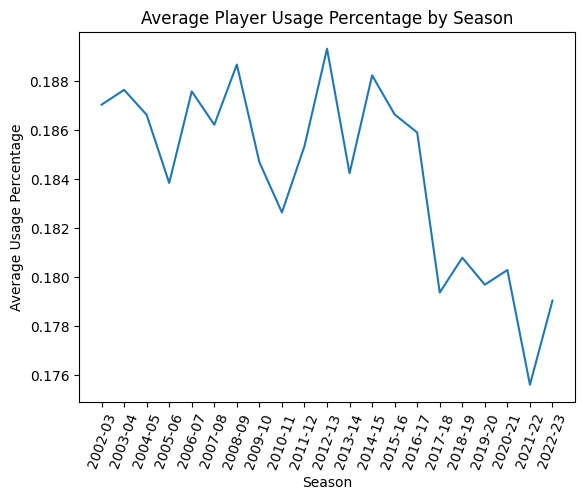

In [242]:
usg = final_df[['season', 'usg_pct']].groupby(by='season').agg('mean')
plt.plot(usg.index, usg['usg_pct'])
plt.xticks(rotation=70)
plt.title('Average Player Usage Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Average Usage Percentage')

The following selects every quantitative data type in the final_df that relates to team statistics, then adds the team name and season columns before creating a pivot table with `TEAM` as the index and `season` as the column. Then, the table is stacked. This creates a table where it is easy to see every season for every team.

In [201]:
quantitative = [col for col in final_df.select_dtypes(include=np.number) if col.endswith('_TEAM')]
to_pivot = pd.concat([final_df[quantitative], final_df[['TEAM', 'season']]], axis=1)
teams_by_season = pd.pivot_table(to_pivot, index='TEAM', columns='season').stack()
display(teams_by_season)

3P%_TEAM  3PA_TEAM  3PM_TEAM  AST_TEAM  BLK_TEAM  \
TEAM          season                                                      
Atlanta Hawks 2002-03      35.2      13.9       4.9      20.5       5.8   
              2003-04      33.5      15.2       5.1      20.1       5.0   
              2004-05      31.2      11.9       3.7      19.7       4.2   
              2005-06      36.7      14.1       5.2      19.8       4.8   
              2006-07      32.9      12.7       4.2      19.2       5.4   
...                         ...       ...       ...       ...       ...   
Utah Jazz     2018-19      35.6      34.0      12.1      26.0       5.9   
              2019-20      38.0      35.2      13.4      22.4       4.1   
              2020-21      38.9      43.0      16.7      23.7       5.2   
              2021-22      36.0      40.3      14.5      22.4       4.9   
              2022-23      35.3      37.8      13.3      26.0       5.2   

                       DREB_TEAM  FG%_TEAM  FGA_TEAM  FGM_TEAM  FT%_TEAM  \
TEAM          season                                                       
Atlanta Hawks 2002-03       31.2      44.4      78.5      34.9    79.300   
              2003-04       30.6      43.3      79.6      34.5    77.600   
              2004-05       28.5      44.1      81.4      35.9    71.100   
              2005-06       27.2      45.4      79.2      35.9    75.000   
              2006-07       28.2      44.4      77.7      34.5    76.100   
...                          ...       ...       ...       ...       ...   
Utah Jazz     2018-19       36.4      46.8      86.4      40.4    73.600   
              2019-20       35.8      47.1      85.1      40.1    77.900   
              2020-21       37.6      46.8      88.1      41.3     0.799   
              2021-22       35.6      47.1      86.2      40.6     0.767   
              2022-23       34.1      47.3      89.8      42.5     0.786   

                       FTA_TEAM  FTM_TEAM  OREB_TEAM  PF_TEAM  PTS_TEAM  \
TEAM          season                                                      
Atlanta Hawks 2002-03      24.5      19.4       11.4     21.7      94.1   
              2003-04      24.1      18.7       12.1     22.3      92.8   
              2004-05      24.3      17.3       13.4     24.5      92.7   
              2005-06      26.9      20.2       13.0     25.0      97.2   
              2006-07      26.9      20.5       11.9     24.0      93.7   
...                         ...       ...        ...      ...       ...   
Utah Jazz     2018-19      25.5      18.8       10.0     21.1     111.7   
              2019-20      22.8      17.8        9.1     20.4     111.3   
              2020-21      21.5      17.2       10.6     18.5     116.4   
              2021-22      23.4      17.9       10.8     18.9     113.6   
              2022-23      23.8      18.7       11.8     20.5     117.1   

                       REB_TEAM  STL_TEAM  TOV_TEAM  
TEAM          season                                 
Atlanta Hawks 2002-03      42.6       7.5      16.7  
              2003-04      42.7       7.6      16.5  
              2004-05      41.9       7.7      16.1  
              2005-06      40.3       7.2      15.7  
              2006-07      40.1       7.4      15.9  
...                         ...       ...       ...  
Utah Jazz     2018-19      46.4       8.1      15.1  
              2019-20      44.9       6.1      15.1  
              2020-21      48.3       6.6      14.2  
              2021-22      46.3       7.2      14.0  
              2022-23      45.9       6.1      15.4  

[564 rows x 18 columns]

The following uses the above pivot table to graph 5 lines on a plot comparing the selected teams' 3 point attempts by season to each other. Some good shooting teams and bad shooting teams were selected to represent a variety of data. It can be seen that despite the popular narrative that the Warriors are responsible for the explosion in 3 point attempts around the league, this does not seem to be the case: 3 point attempts have been rising rapidly since around 2011-12, in which the Warriors only won 35% of their games and in which Stephen Curry, the player most commonly cited as the reason for the 3 point explosion, played his third and one of his worst seasons riddled with injury. 

Text(0, 0.5, '3 Pointers Attempted/Game')

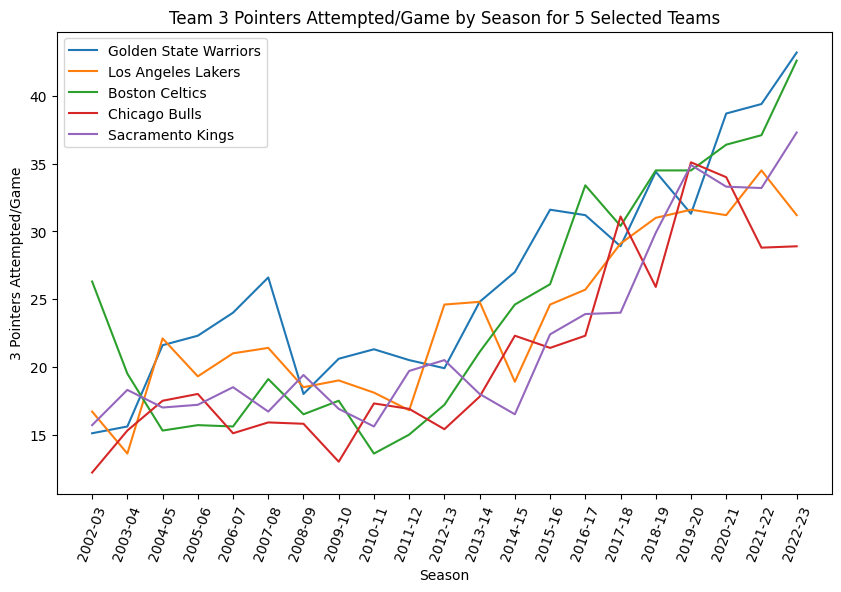

In [238]:
plt.figure(figsize=(10, 6))
to_plot = ['Golden State Warriors', 'Los Angeles Lakers', 'Boston Celtics', 'Chicago Bulls', 'Sacramento Kings']
for i in to_plot:
    plt.plot(teams_by_season.loc[i].index.get_level_values(0), teams_by_season.loc[i]['3PA_TEAM'])
plt.xticks(rotation=70)
plt.title('Team 3 Pointers Attempted/Game by Season for 5 Selected Teams')
plt.legend(to_plot)
plt.xlabel('Season')
plt.ylabel('3 Pointers Attempted/Game')

### Conclusion
In conclusion, we can see that many meaningful correlations can be extracted from this data. While this alone cannot imply any causation, we can, however, suggest possible explanations for each correlation based on our knowledge of basketball and NBA history. There were also many limitations with our datasets, the greatest of which are a lack of shooting percentages and general shot data for individual players. Despite this, we think the analysis we were able to do was fairly interesting, at least from the perspective of NBA fans.